In [1]:
import torch
import os
import numpy as np
import pandas as pd
import skimage
from skimage import io
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append("../Dataset_utils")

In [2]:
from poses_parser import pose_2_sixd_array

In [3]:
os.listdir("../../Datasets/GPS/train_sorted")

['rgb', 'addl_scene_info', 'poses']

In [6]:
print(os.listdir("../../Datasets/GPS/train_sorted/rgb"))

['Echendens-LHS_13539.png', 'Echendens-LHS_08225.png', 'Echendens-LHS_01986.png', 'Echendens-LHS_02366.png', 'Echendens-LHS_06434.png', 'Echendens-LHS_05294.png', 'Echendens-LHS_02583.png', 'Echendens-LHS_01801.png', 'Echendens-LHS_08464.png', 'Echendens-LHS_11113.png', 'Echendens-LHS_03296.png', 'Echendens-LHS_10304.png', 'Echendens-LHS_09518.png', 'Echendens-LHS_13554.png', 'Echendens-LHS_10931.png', 'Echendens-LHS_08387.png', 'Echendens-LHS_09900.png', 'Echendens-LHS_14713.png', 'Echendens-LHS_11581.png', 'Echendens-LHS_11460.png', 'Echendens-LHS_12848.png', 'Echendens-LHS_11619.png', 'Echendens-LHS_03375.png', 'Echendens-LHS_03436.png', 'Echendens-LHS_02867.png', 'Echendens-LHS_02063.png', 'Echendens-LHS_13144.png', 'Echendens-LHS_00844.png', 'Echendens-LHS_13349.png', 'Echendens-LHS_01483.png', 'Echendens-LHS_14325.png', 'Echendens-LHS_12242.png', 'Echendens-LHS_13097.png', 'Echendens-LHS_07966.png', 'Echendens-2022-05-13-piloted-sim_00209_DJI_0210.png', 'Echendens-LHS_00408.png',

In [7]:
print(os.listdir("../../Datasets/GPS/train_sorted/addl_scene_info"))

['calibration', 'init', 'semantics', 'normal', 'depth']


In [475]:
print(os.listdir("../../Datasets/GPS/train_sorted/addl_scene_info/depth"))

['Echendens-2022-05-13-piloted-sim_00275_DJI_0276.dat', 'Echendens-LHS_12629.dat', 'Echendens-LHS_04671.dat', 'Echendens-LHS_08759.dat', 'Echendens-LHS_12907.dat', 'Echendens-LHS_02989.dat', 'Echendens-LHS_02216.dat', 'Echendens-LHS_00101.dat', 'Echendens-LHS_09736.dat', 'Echendens-LHS_05346.dat', 'Echendens-LHS_00301.dat', 'Echendens-LHS_09767.dat', 'Echendens-LHS_08573.dat', 'Echendens-LHS_02757.dat', 'Echendens-LHS_07041.dat', 'Echendens-LHS_11094.dat', 'Echendens-LHS_04003.dat', 'Echendens-LHS_07815.dat', 'Echendens-LHS_06435.dat', 'Echendens-LHS_00723.dat', 'Echendens-LHS_05419.dat', 'Echendens-LHS_09646.dat', 'Echendens-LHS_08260.dat', 'Echendens-LHS_04090.dat', 'Echendens-LHS_01837.dat', 'Echendens-LHS_01280.dat', 'Echendens-LHS_09572.dat', 'Echendens-LHS_12415.dat', 'Echendens-LHS_12125.dat', 'Echendens-LHS_02801.dat', 'Echendens-LHS_13107.dat', 'Echendens-LHS_02385.dat', 'Echendens-LHS_05941.dat', 'Echendens-LHS_07702.dat', 'Echendens-LHS_14026.dat', 'Echendens-LHS_08535.dat',

In [3]:
sem = np.fromfile("../../Datasets/GPS/train_sorted/addl_scene_info/semantics/Echendens-2022-05-14-piloted-sim_00013_DJI_0014.npy",
                  dtype=np.uint8,
                  offset=128
                 )
pos = torch.load("../../Datasets/GPS/train_sorted/addl_scene_info/init/Echendens-2022-05-14-piloted-sim_00013_DJI_0014.dat",
                #  dtype=np.int8
                #  ,
                 )
nor = torch.load("../../Datasets/GPS/train_sorted/addl_scene_info/normal/Echendens-2022-05-14-piloted-sim_00013_DJI_0014.dat",
                 #dtype=np.uint8
                 )
dep = torch.load("../../Datasets/GPS/train_sorted/addl_scene_info/depth/Echendens-2022-05-14-piloted-sim_00013_DJI_0014.dat",
                 #dtype=np.uint8
                 )
cal = np.loadtxt("../../Datasets/GPS/train_sorted/addl_scene_info/calibration/Echendens-2022-05-14-piloted-sim_00013_DJI_0014.txt",
                dtype=np.float16
                )

pss = np.loadtxt("../../Datasets/GPS/train_sorted/poses/Echendens-2022-05-14-piloted-sim_00013_DJI_0014.txt",
                dtype=np.float16
                )

In [4]:
print(pss)
pose_2_sixd_array(pss)

[[ 4.597e-01  5.117e-01 -7.261e-01  3.995e+02]
 [ 7.261e-01 -6.870e-01 -2.454e-02 -8.225e+01]
 [-5.112e-01 -5.156e-01 -6.875e-01 -2.678e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]


(6.541141661224633,
 46.531313153158955,
 512.2662412505597,
 4367382.90348214,
 500777.42992247775,
 4606447.520014312,
 140.74103251856332,
 323.6913413516132,
 284.68950807899324,
 399.5,
 -82.25,
 -267.8)

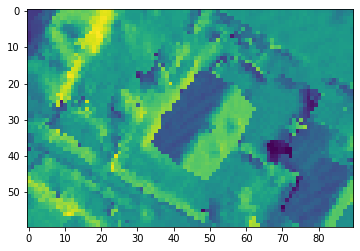

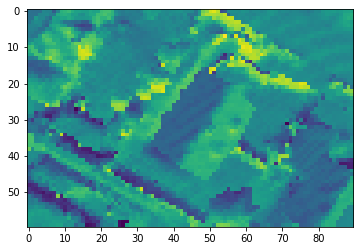

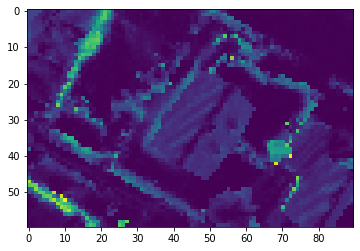

In [474]:
plt.imshow(nor.numpy()[0,:,:])
plt.show()
plt.imshow(nor.numpy()[1,:,:])
plt.show()
plt.imshow(nor.numpy()[2,:,:])
plt.show()

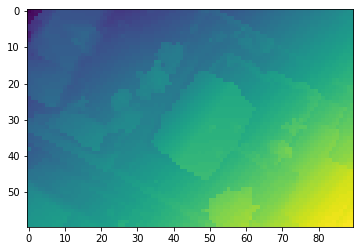

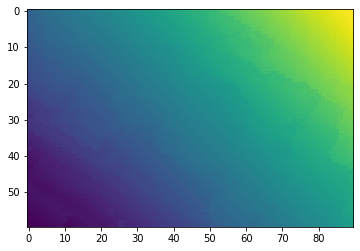

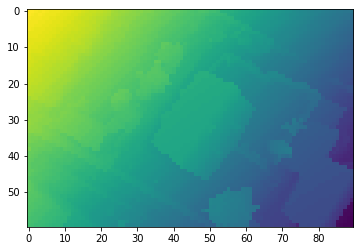

In [473]:
plt.imshow(pos.numpy()[0,:,:])
plt.show()
plt.imshow(pos.numpy()[1,:,:])
plt.show()
plt.imshow(pos.numpy()[2,:,:])
plt.show()

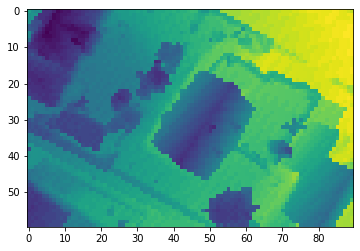

In [480]:
plt.imshow(dep.numpy())
plt.show()

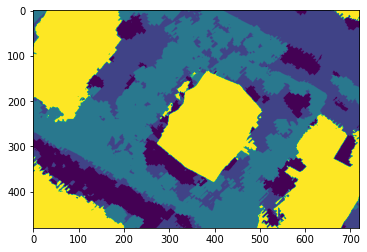

In [240]:
plt.imshow(sem[128:].reshape(480,720))

In [86]:
image=io.imread("../../Datasets/GPS/train_sorted/rgb/Echendens-2022-05-14-piloted-sim_00013_DJI_0014.png")

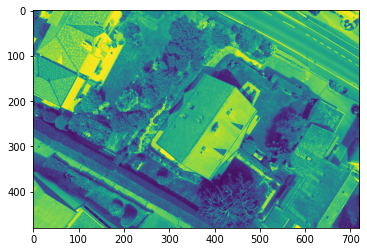

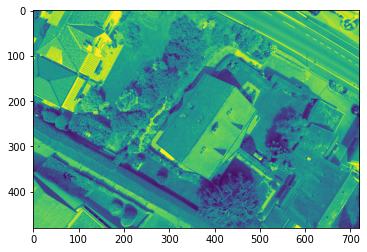

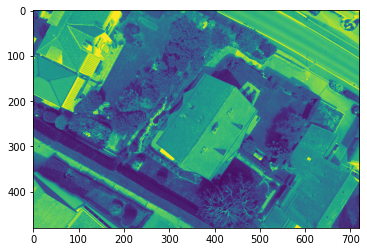

In [169]:
plt.imshow(image[:,:,0])
plt.show()
plt.imshow(image[:,:,1])
plt.show()
plt.imshow(image[:,:,2])
plt.show()

In [88]:
image.shape[1]*image.shape[0]

345600

In [272]:
np.fromfile?